In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder


In [4]:
# Define the URL of the dataset
dataset_url = "https://raw.githubusercontent.com/fdwsc2005/BankChurnPredictor/master/Customer-Churn-Records.csv"
# Load the dataset
df = pd.read_csv(dataset_url)

In [5]:
# create a copy of the dataset
df_copy = df.copy()

In [6]:
# Display the first few rows
print("Head of the DataFrame:")
df_copy.head()

Head of the DataFrame:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
# Display the shape of the DataFrame
print("\nShape:")
print(df_copy.shape)


Shape:
(10000, 18)


In [8]:
# Display DataFrame information
print("\nDataFrame Info:")
df_copy.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  i

In [9]:
# Display summary statistics
print("\nDataFrame Describe:")
df_copy.describe()


DataFrame Describe:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [10]:
# Display column names
print("\nColumn Names:")
print(df_copy.columns)


Column Names:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [11]:
# Age Binning
def age_binning(age):
    if age <= 18:
        return 'Teenager'
    elif age <= 30:
        return 'Young Adult'
    elif age <= 50:
        return 'Middle-Aged'
    else:
        return 'Senior'

# Balance to Salary Ratio
def balance_to_salary_ratio(balance, salary):
    if salary != 0:
        return balance / salary
    else:
        return 0  # Avoid division by zero

# CreditScore to Age Ratio
def credit_score_to_age_ratio(credit_score, age):
    if age != 0:
        return credit_score / age
    else:
        return 0  # Avoid division by zero

# Interaction Features
def interaction_features(balance, credit_score):
    return balance * credit_score

# Tenure to Age Ratio
def tenure_to_age_ratio(tenure, age):
    if age != 0:
        return tenure / age
    else:
        return 0  # Avoid division by zero

# Applying transformations to df_copy
df_copy['AgeGroup'] = df_copy['Age'].apply(age_binning)
df_copy['BalanceSalaryRatio'] = df_copy.apply(lambda row: balance_to_salary_ratio(row['Balance'], row['EstimatedSalary']), axis=1)
df_copy['CreditScoreAgeRatio'] = df_copy.apply(lambda row: credit_score_to_age_ratio(row['CreditScore'], row['Age']), axis=1)
df_copy['InteractionFeature'] = df_copy.apply(lambda row: interaction_features(row['Balance'], row['CreditScore']), axis=1)
df_copy['TenureAgeRatio'] = df_copy.apply(lambda row: tenure_to_age_ratio(row['Tenure'], row['Age']), axis=1)

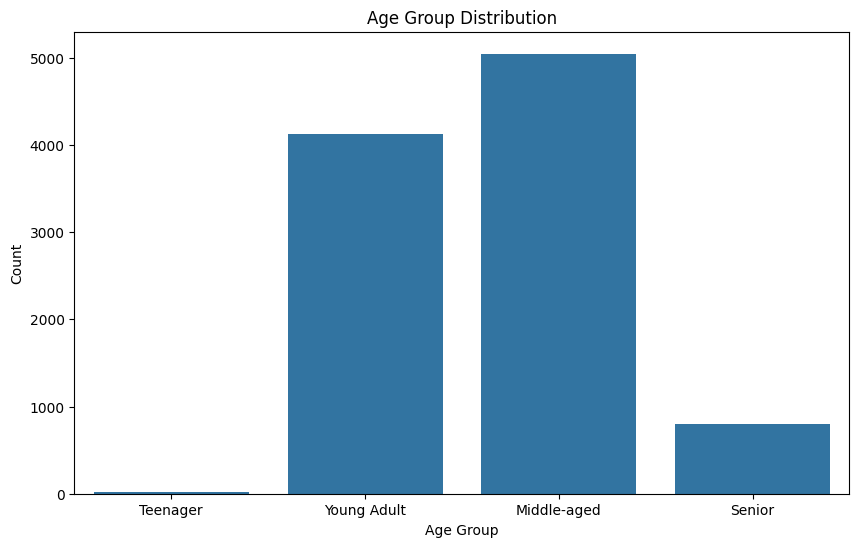

In [12]:
# Create age bins
bins = [0, 18, 35, 55, df_copy['Age'].max()]
labels = ['Teenager', 'Young Adult', 'Middle-aged', 'Senior']
df_copy['AgeGroup'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)

# Visualize age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='AgeGroup')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

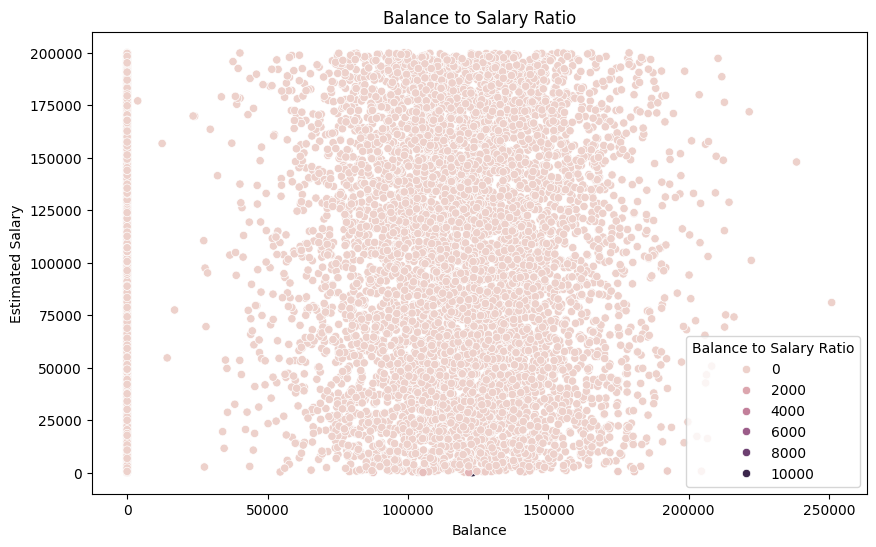

In [13]:
# Calculate balance to salary ratio
df_copy['BalanceSalaryRatio'] = df_copy['Balance'] / df_copy['EstimatedSalary']

# Visualize balance to salary ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Balance', y='EstimatedSalary', hue='BalanceSalaryRatio')
plt.title('Balance to Salary Ratio')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.legend(title='Balance to Salary Ratio')
plt.show()

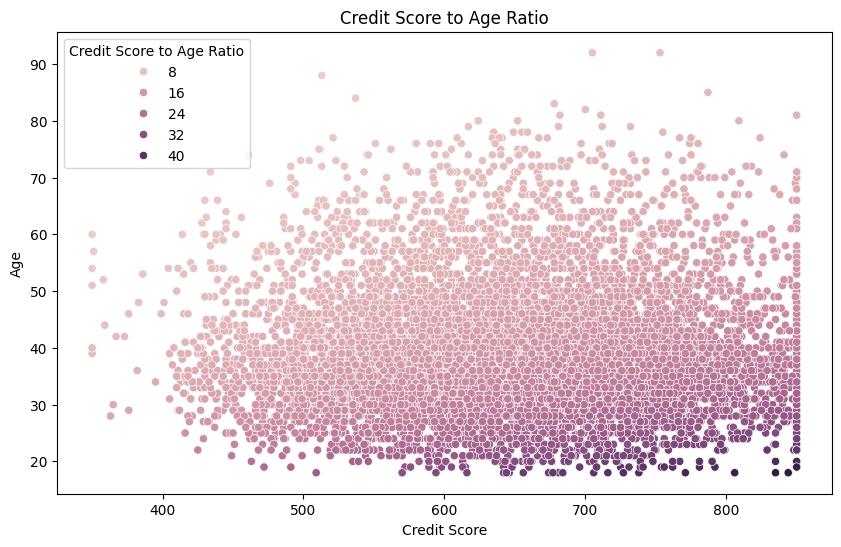

In [14]:
# Calculate credit score to age ratio
df_copy['CreditScoreAgeRatio'] = df_copy['CreditScore'] / df_copy['Age']

# Visualize credit score to age ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='CreditScore', y='Age', hue='CreditScoreAgeRatio')
plt.title('Credit Score to Age Ratio')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.legend(title='Credit Score to Age Ratio')
plt.show()

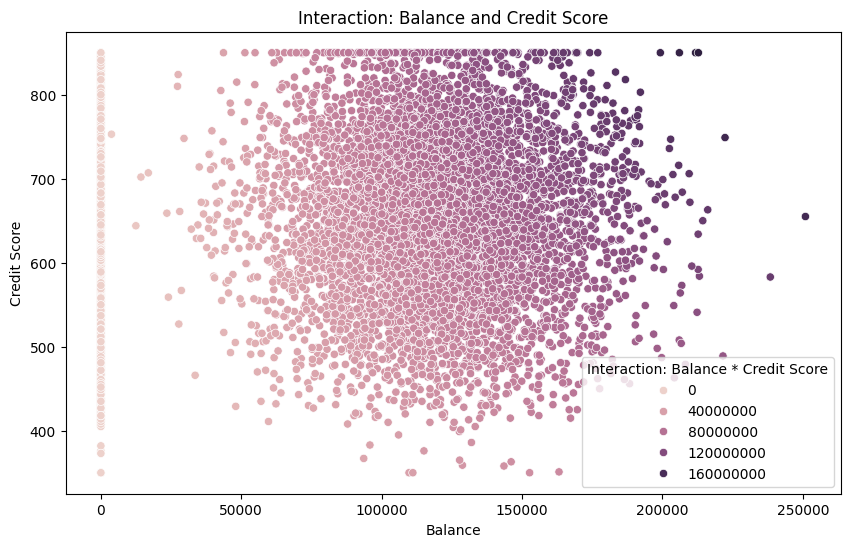

In [15]:
# Create interaction features
df_copy['Balance_CreditScore'] = df_copy['Balance'] * df_copy['CreditScore']

# Visualize interaction features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Balance', y='CreditScore', hue='Balance_CreditScore')
plt.title('Interaction: Balance and Credit Score')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Interaction: Balance * Credit Score')
plt.show()

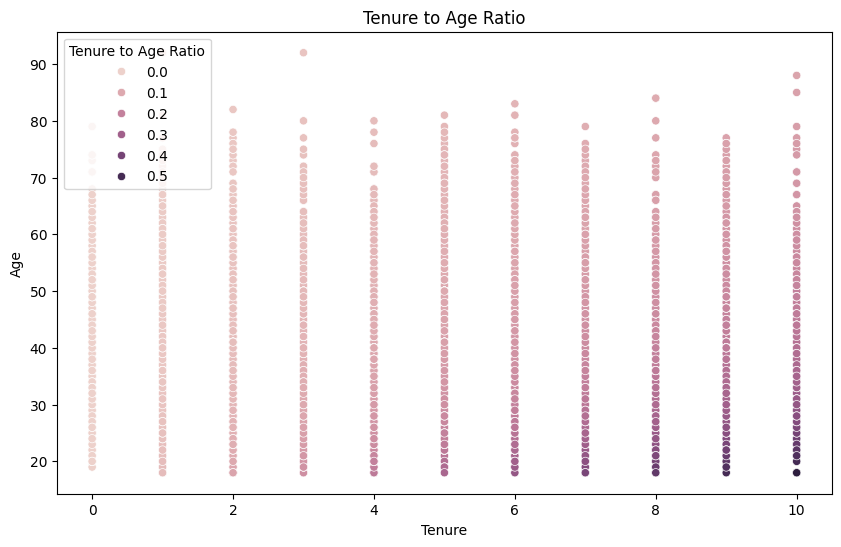

In [16]:
# Calculate tenure to age ratio
df_copy['TenureAgeRatio'] = df_copy['Tenure'] / df_copy['Age']

# Visualize tenure to age ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Tenure', y='Age', hue='TenureAgeRatio')
plt.title('Tenure to Age Ratio')
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.legend(title='Tenure to Age Ratio')
plt.show()

In [17]:
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,BalanceSalaryRatio,CreditScoreAgeRatio,InteractionFeature,TenureAgeRatio,Balance_CreditScore
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,2,DIAMOND,464,Middle-aged,0.000000,14.738095,0.000000e+00,0.047619,0.000000e+00
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,3,DIAMOND,456,Middle-aged,0.744677,14.829268,5.095518e+07,0.024390,5.095518e+07
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1,3,DIAMOND,377,Middle-aged,1.401375,11.952381,8.014972e+07,0.190476,8.014972e+07
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,5,GOLD,350,Middle-aged,0.000000,17.923077,0.000000e+00,0.025641,0.000000e+00
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,5,GOLD,425,Middle-aged,1.587055,19.767442,1.066842e+08,0.046512,1.066842e+08


In [18]:
# Count null values in each column
print("\nNull Value Counts:")
print(df_copy.isnull().sum())


Null Value Counts:
RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Complain               0
Satisfaction Score     0
Card Type              0
Point Earned           0
AgeGroup               0
BalanceSalaryRatio     0
CreditScoreAgeRatio    0
InteractionFeature     0
TenureAgeRatio         0
Balance_CreditScore    0
dtype: int64


In [19]:
# Count duplicated rows
print("\nDuplicated Rows Count:")
print(df_copy.duplicated().sum())


Duplicated Rows Count:
0


In [20]:
# check the data types of the columns
print("\nData Types:")
print(df_copy.dtypes)


Data Types:
RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
Complain                  int64
Satisfaction Score        int64
Card Type                object
Point Earned              int64
AgeGroup               category
BalanceSalaryRatio      float64
CreditScoreAgeRatio     float64
InteractionFeature      float64
TenureAgeRatio          float64
Balance_CreditScore     float64
dtype: object


In [21]:
#Remove column spaces from column names
df_copy.columns = df_copy.columns.str.replace(' ', '')

In [22]:
#Convert float columns to integer
df_copy['Balance'] = df_copy['Balance'].astype(int)
df_copy['EstimatedSalary'] = df_copy['EstimatedSalary'].astype(int)

In [23]:
# Check to see if the changes were made
print("Head of the DataFrame:")
df_copy.head()

Head of the DataFrame:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Complain,SatisfactionScore,CardType,PointEarned,AgeGroup,BalanceSalaryRatio,CreditScoreAgeRatio,InteractionFeature,TenureAgeRatio,Balance_CreditScore
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,...,1,2,DIAMOND,464,Middle-aged,0.000000,14.738095,0.000000e+00,0.047619,0.000000e+00
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,...,1,3,DIAMOND,456,Middle-aged,0.744677,14.829268,5.095518e+07,0.024390,5.095518e+07
2,3,15619304,Onio,502,France,Female,42,8,159660,3,...,1,3,DIAMOND,377,Middle-aged,1.401375,11.952381,8.014972e+07,0.190476,8.014972e+07
3,4,15701354,Boni,699,France,Female,39,1,0,2,...,0,5,GOLD,350,Middle-aged,0.000000,17.923077,0.000000e+00,0.025641,0.000000e+00
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510,1,...,0,5,GOLD,425,Middle-aged,1.587055,19.767442,1.066842e+08,0.046512,1.066842e+08


In [24]:
# Define age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 120]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Create the 'AgeGroup' column
df_copy['AgeGroup'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels, right=False)

In [25]:
# Create correlation matrix
corr = df_copy.corr(numeric_only=True)

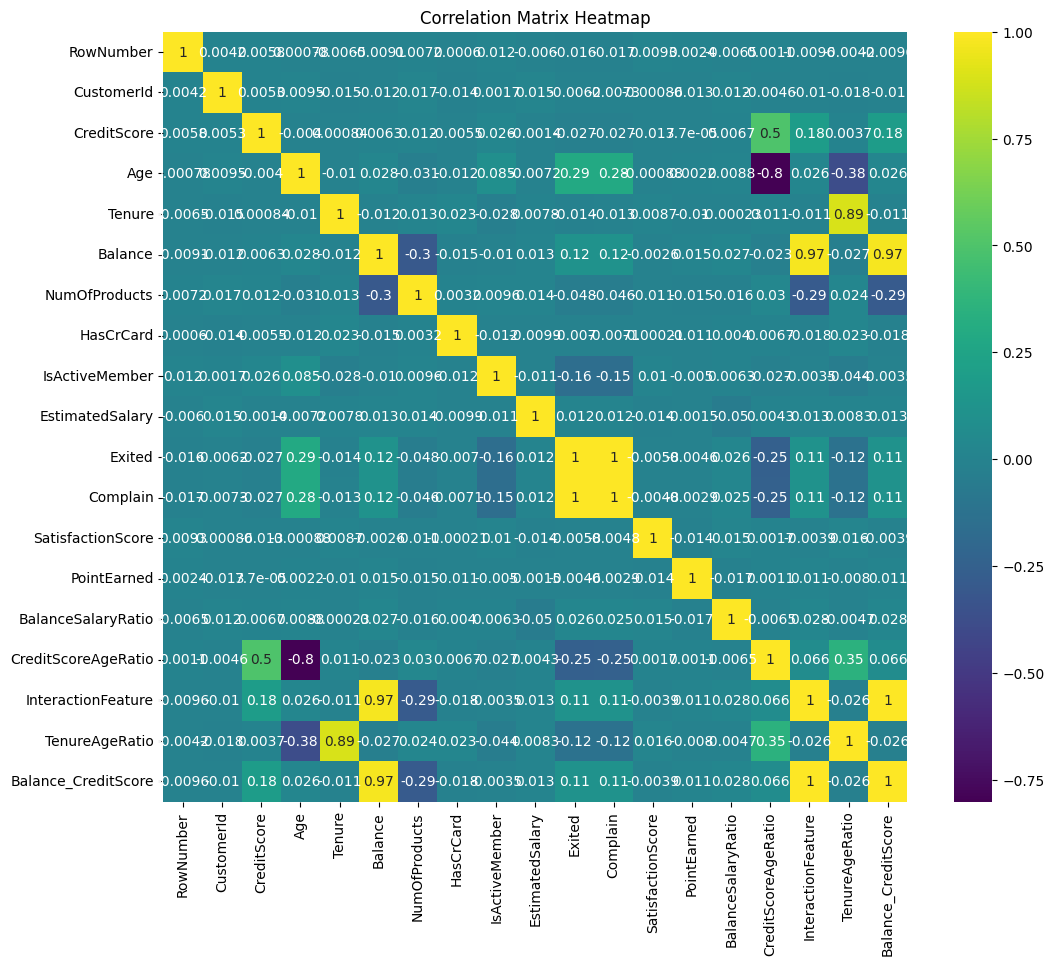

In [26]:
# Correlation matrix heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
def create_count_plot(data, feature, title, hue=None, palette=None):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x=feature, hue=hue, palette=palette)
    ax.set_facecolor('#F6F5F4')
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel("Categories", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f}%'.format((height / total) * 100),
                ha="center", fontsize=10, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    plt.tight_layout()
    plt.show()

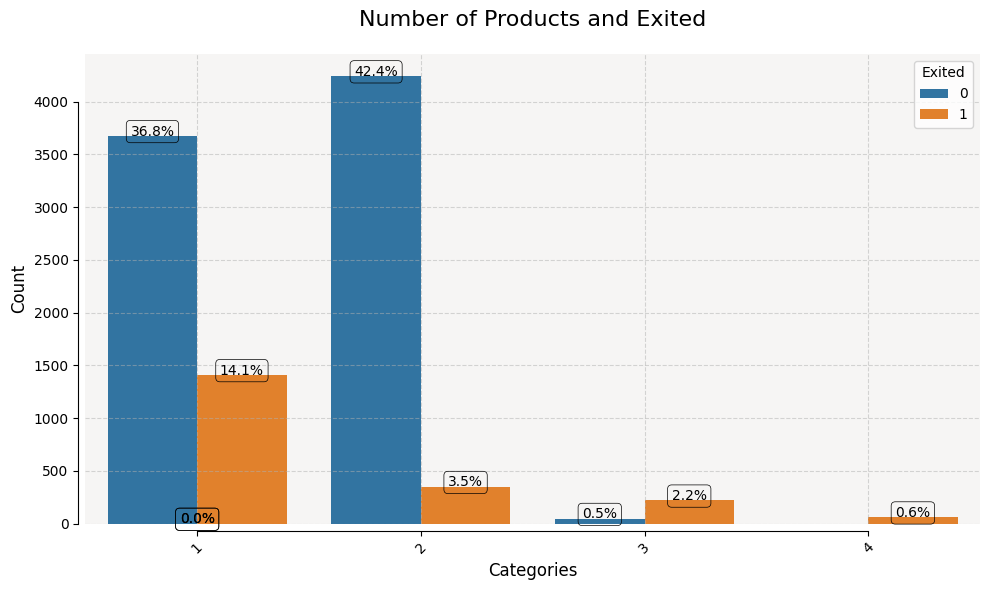

In [28]:
create_count_plot(df_copy, 'NumOfProducts', 'Number of Products and Exited', hue='Exited')

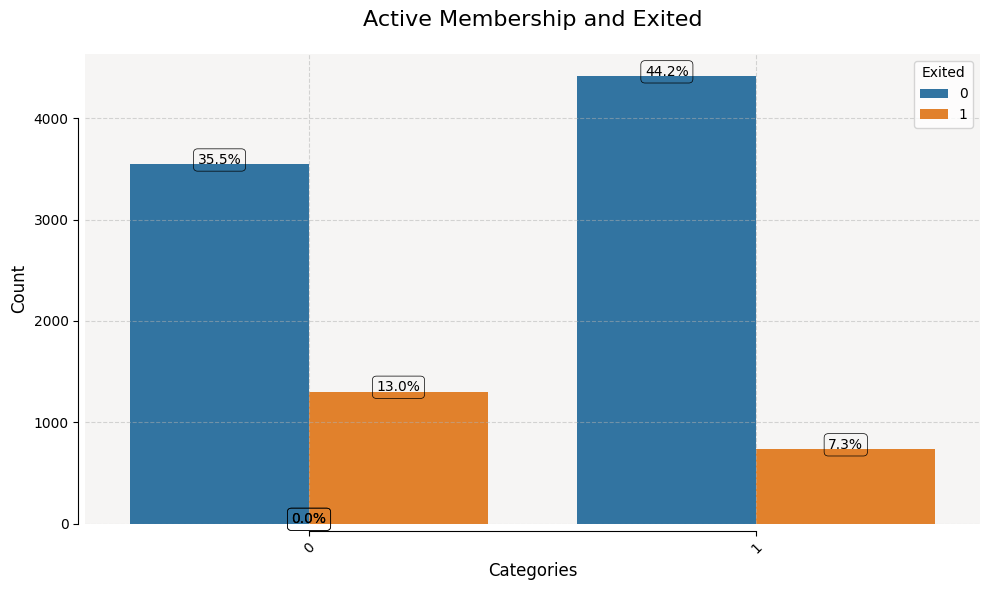

In [29]:
create_count_plot(df_copy, 'IsActiveMember', 'Active Membership and Exited', hue='Exited')

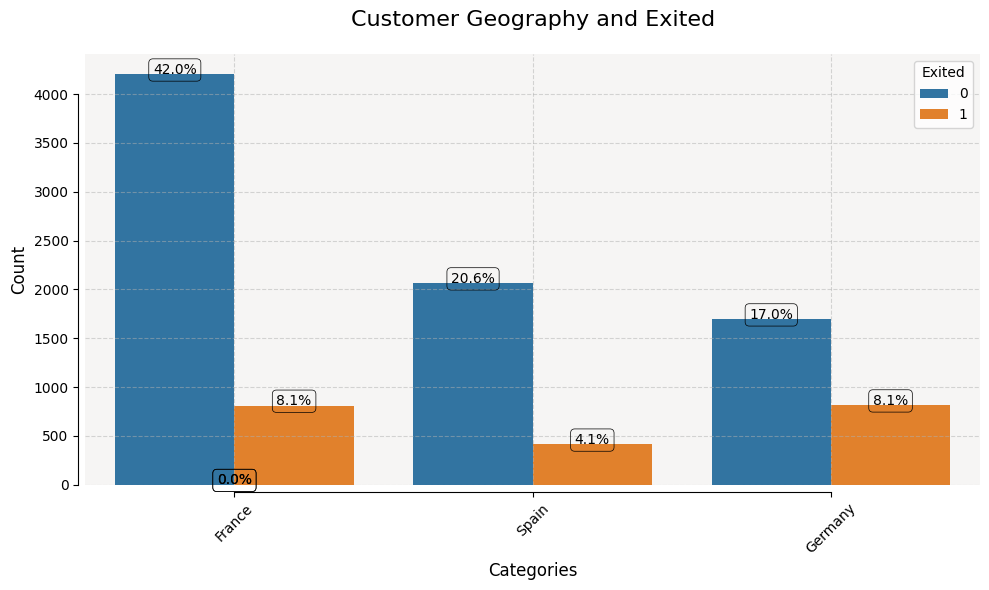

In [30]:
create_count_plot(df_copy, 'Geography', 'Customer Geography and Exited', hue='Exited')

In [31]:
# Calulate churn rate by geography as a percentage
churn_rate_geography = df_copy.groupby('Geography')['Exited'].mean() * 100
print("Churn Rate by Geography:")
for geography, churn_rate in churn_rate_geography.items():
    print(f"{geography}: {churn_rate:.2f}%")

Churn Rate by Geography:
France: 16.17%
Germany: 32.44%
Spain: 16.67%


In [32]:
# Value counts for Geography column
geography_counts = df_copy['Geography'].value_counts()
print("Counts for each unique value in the 'Geography' column:")
print(geography_counts)

Counts for each unique value in the 'Geography' column:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [33]:
# Display the columns of the DataFrame
print("\nColumns:")
print(df_copy.columns)


Columns:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'SatisfactionScore', 'CardType', 'PointEarned', 'AgeGroup',
       'BalanceSalaryRatio', 'CreditScoreAgeRatio', 'InteractionFeature',
       'TenureAgeRatio', 'Balance_CreditScore'],
      dtype='object')


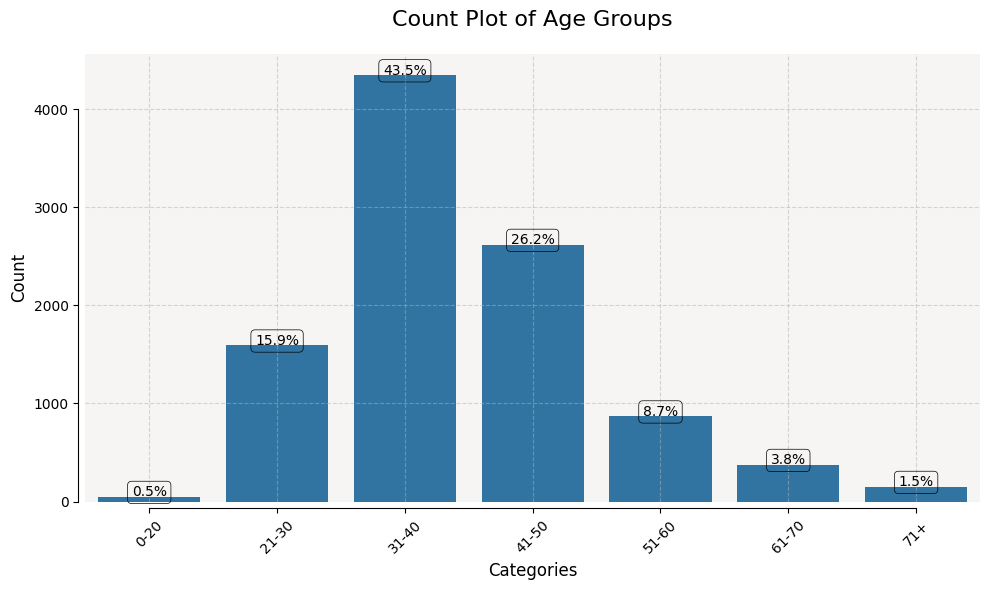

In [34]:
# Call function for age groups
create_count_plot(df_copy, 'AgeGroup', 'Count Plot of Age Groups')

In [41]:
# Calculate churn rate percentage by age group
churn_rate_age_group = df_copy.groupby('AgeGroup')['Exited'].mean() * 100
print("Churn Rate by AgeGroup:")
for age_group, churn_rate in churn_rate_age_group.items():
    print(f"{age_group}: {churn_rate:.2f}%")

churn_rate_age_group = df_copy.groupby('AgeGroup', observed=False)['Exited'].mean() * 100

Churn Rate by AgeGroup:
0-20: 6.12%
21-30: 7.60%
31-40: 10.88%
41-50: 30.83%
51-60: 56.04%
61-70: 35.20%
71+: 9.93%


/tmp/ipykernel_1873/3027000116.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_age_group = df_copy.groupby('AgeGroup')['Exited'].mean() * 100


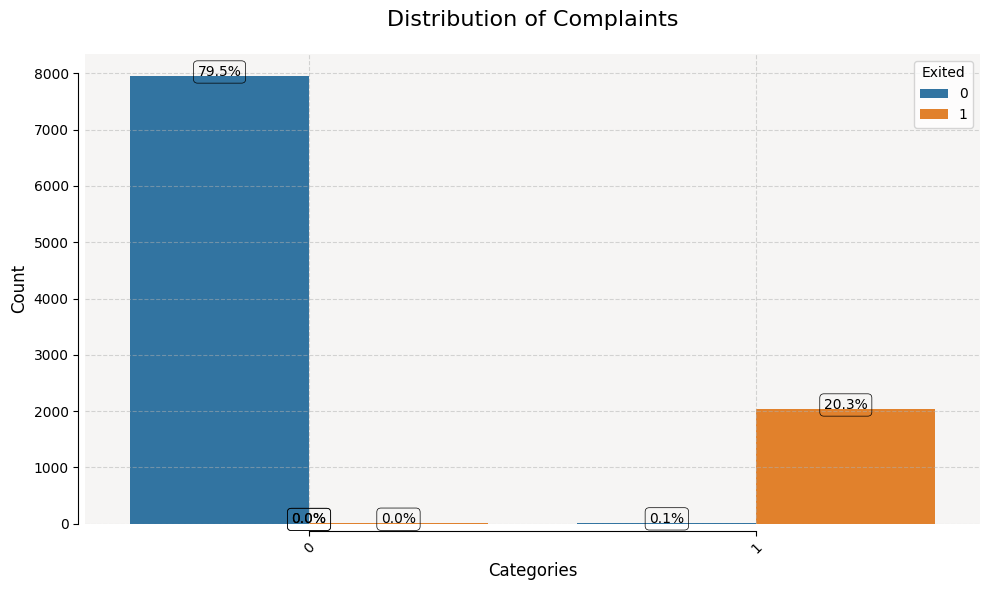

In [36]:
# Call function for complaints
create_count_plot(df_copy, 'Complain', 'Distribution of Complaints', hue='Exited')

In [37]:
# display column names
print("\nColumn Names:")
print(df_copy.columns)


Column Names:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'SatisfactionScore', 'CardType', 'PointEarned', 'AgeGroup',
       'BalanceSalaryRatio', 'CreditScoreAgeRatio', 'InteractionFeature',
       'TenureAgeRatio', 'Balance_CreditScore'],
      dtype='object')


In [42]:
# Calculate churn rate percentage by Complain
churn_rate_complain = df_copy.groupby('Complain')['Exited'].mean() * 100
print("Churn Rate by Complain:")
for Complain, churn_rate in churn_rate_complain.items():
    print(f"{Complain}: {churn_rate:.2f}%")

Churn Rate by Complain:
0: 0.05%
1: 99.51%


The churn rate for customers who did not complain (Complain = 0) is very low (0.05%), while the churn rate for customers who complained (Complain = 1) is much higher (99.51%). This suggests that there might be a strong correlation between customer complaints and churn.

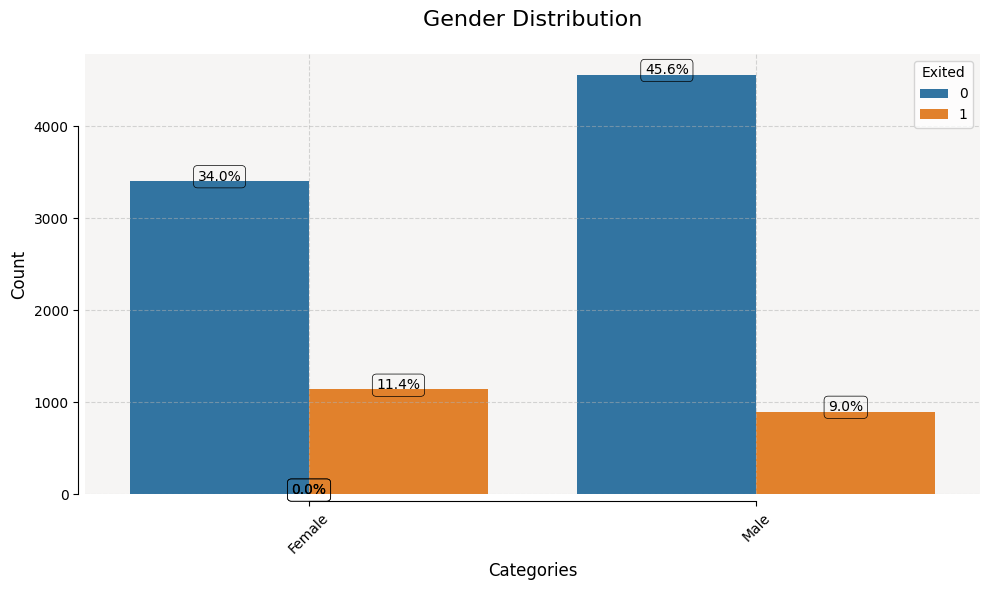

In [ ]:
# Call function for Gender
create_count_plot(df_copy, 'Gender', 'Gender Distribution', hue='Exited')

In [ ]:
#Calulate churn rate for gender
churn_rate_gender = df_copy.groupby('Gender')['Exited'].mean() * 100
print("Churn Rate by Gender:")
for Gender, churn_rate in churn_rate_gender.items():
    print(f"{Gender}: {churn_rate:.2f}%")

Churn Rate by Gender:
Female: 25.07%
Male: 16.47%


In [ ]:
# Define the bin edges
bin_edges = [0, 400, 600, 800, 1000]

# Define the bin labels
bin_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Create the CreditScoreBins column by binning the CreditScore column
df_copy['CreditScoreBins'] = pd.cut(df_copy['CreditScore'], bins=bin_edges, labels=bin_labels, right=False)

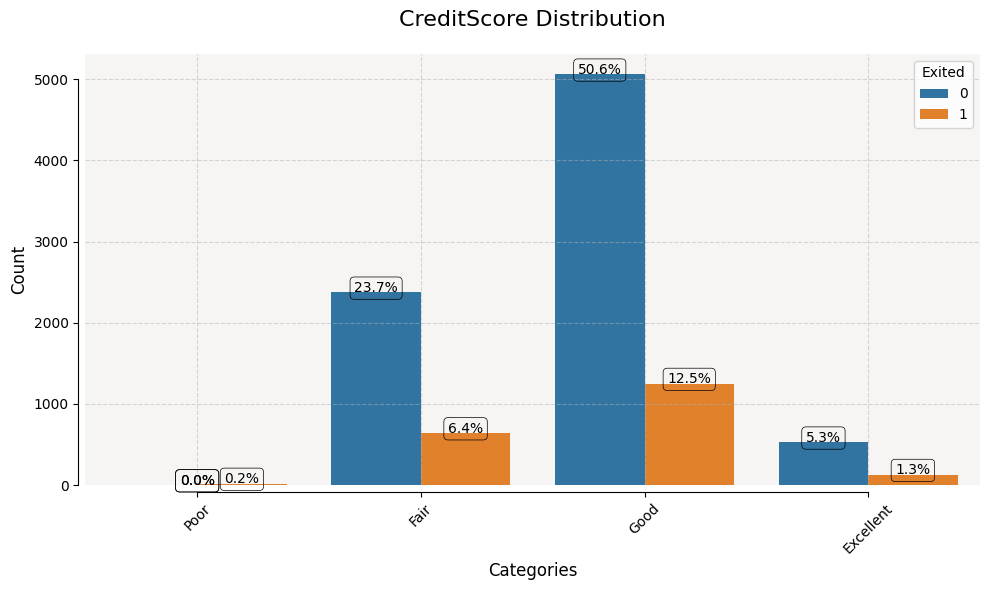

In [ ]:
# Call function for CreditScore
create_count_plot(df_copy, 'CreditScoreBins', 'CreditScore Distribution', hue='Exited')

In [ ]:
# Calculate churn rate for CreditScore
churn_rate_creditscore = df_copy.groupby('CreditScoreBins', observed=False)['Exited'].mean() * 100
print("Churn Rate by CreditScore:")
for CreditScoreBins, churn_rate in churn_rate_creditscore.items():
    print(f"{CreditScoreBins}: {churn_rate:.2f}%")

Churn Rate by CreditScore:
Poor: 100.00%
Fair: 21.26%
Good: 19.81%
Excellent: 19.54%


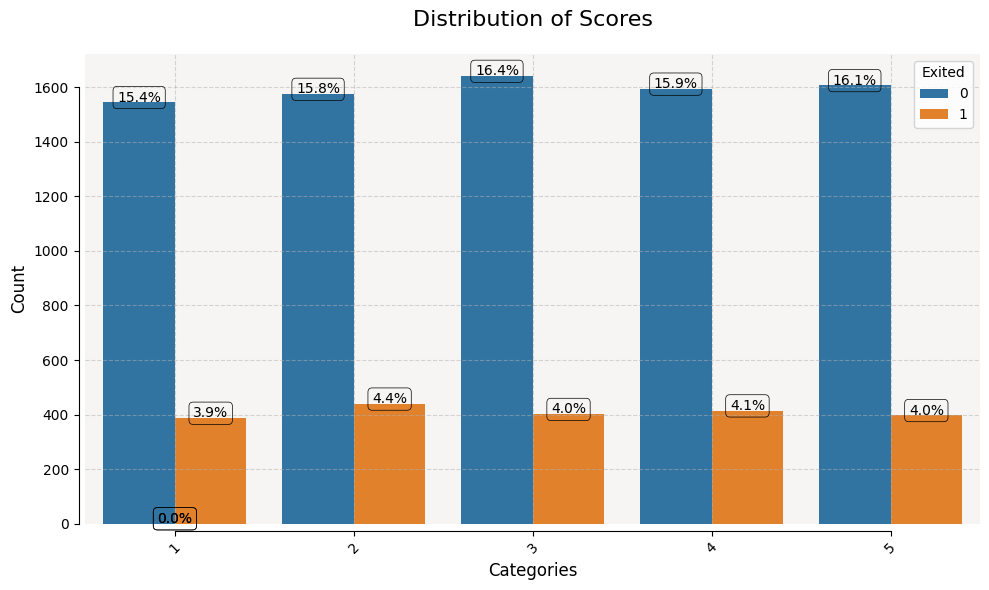

In [ ]:
# Call function for Satisfaction Score
create_count_plot(df_copy, 'SatisfactionScore', 'Distribution of Scores', hue= 'Exited')

In [ ]:
# Calulate churn rate for SatisfactionScore
churn_rate_satisfaction = df_copy.groupby('SatisfactionScore')['Exited'].mean() * 100
print("Churn Rate by Satisfaction:")
for SatisfactionScore, churn_rate in churn_rate_satisfaction.items():
    print(f"{SatisfactionScore}: {churn_rate:.2f}%")

Churn Rate by Satisfaction:
1: 20.03%
2: 21.80%
3: 19.64%
4: 20.62%
5: 19.81%


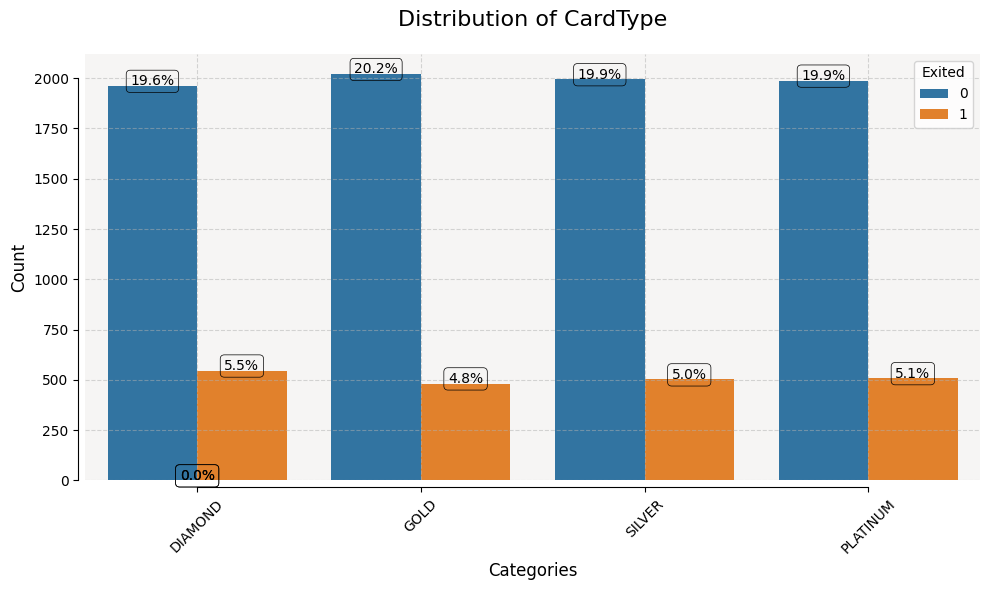

In [ ]:
# Call function for Satisfaction Score
create_count_plot(df_copy, 'CardType', 'Distribution of CardType', hue= 'Exited')

In [ ]:
# Calulate churn rate for CardType
churn_rate_cardtype = churn_rate_complain = df_copy.groupby('CardType')['Exited'].mean() * 100
print("Churn Rate by CardType:")
for CardType, churn_rate in churn_rate_cardtype.items():
    print(f"{SatisfactionScore}: {churn_rate:.2f}%")

Churn Rate by CardType:
5: 21.78%
5: 19.26%
5: 20.36%
5: 20.11%


Bank Customer Churn EDA Findings:

1) Product Ownership: Customers who have multiple products with the bank are less likely to churn. This suggests that offering a diverse range of products and encouraging customers to adopt multiple services can contribute to higher customer retention rates.

2) Active Accounts: Active accounts have a lower likelihood of churn. This emphasizes the importance of engaging customers and promoting activities that encourage their ongoing participation and interaction with the bank's services.

3) Market Analysis: France emerges as the bank's largest market, while Germany experiences the highest churn rate, reaching approximately 32%. This highlights the need for further investigation into the underlying factors contributing to higher churn rates in specific markets.

4) Age and Churn: Customers below the age of 30 show a higher tendency to stay with the bank. Conversely, customers between the ages of 50-60 account for over 56% of those who churn. Understanding the preferences and needs of different age groups can help tailor retention strategies accordingly.

5) Gender Differences: Female customers are observed to be 25% more likely to leave the bank compared to male customers. Exploring the reasons behind this disparity can provide valuable insights into addressing gender-specific factors influencing churn.

6) Complaints and Churn: Customers who file complaints are highly likely to churn. It is crucial to identify the root causes of complaints and address them promptly to mitigate customer dissatisfaction and improve retention rates.

7) Limited Impact Factors: Factors such as credit score, satisfaction score, and card type do not appear to significantly influence customer churn. While these factors may not be primary drivers of churn, further analysis could unveil hidden relationships or interaction effects.

These findings provide valuable insights into the factors associated with customer churn. However, it's essential to conduct additional analysis and consider other potential variables to develop a more comprehensive understanding of customer behavior and retention strategies.

In [ ]:
# Show current columns
df_copy.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'SatisfactionScore', 'CardType', 'PointEarned', 'AgeGroup',
       'CreditScoreBins', 'ExitedStatus', 'HasCrCardStatus',
       'IsActiveMemberStatus', 'ComplainStatus'],
      dtype='object')

In [ ]:
# Drop the specified columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# Check to see if the columns were dropped
print("Head of the DataFrame:")
df.head()

Head of the DataFrame:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [ ]:
# Perform label encoding for 'Card Type'
label_encoder = LabelEncoder()
df['CardTypeEncoded'] = label_encoder.fit_transform(df['Card Type'])

In [ ]:
encoded_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False


In [ ]:
# Print encoded_data
print("Head of the DataFrame:")
encoded_data.head()

Head of the DataFrame:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False


In [ ]:
# Show head of encoded_data
print("Head of the DataFrame:")
encoded_data.head()

Head of the DataFrame:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False


In [ ]:
# Define the features and target columns
features = encoded_data.drop(['Exited'], axis=1)  # Excluding the 'Exited' column
target = encoded_data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1 scores
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Gradient Boosting - Training Accuracy: {train_accuracy:.4f}")
print(f"Gradient Boosting - Test Accuracy: {test_accuracy:.4f}")
print(f"Gradient Boosting - Training Precision: {train_precision:.4f}")
print(f"Gradient Boosting - Test Precision: {test_precision:.4f}")
print(f"Gradient Boosting - Training Recall: {train_recall:.4f}")
print(f"Gradient Boosting - Test Recall: {test_recall:.4f}")
print(f"Gradient Boosting - Training F1 Score: {train_f1:.4f}")
print(f"Gradient Boosting - Test F1 Score: {test_f1:.4f}")

Gradient Boosting - Training Accuracy: 0.9995
Gradient Boosting - Test Accuracy: 0.9980
Gradient Boosting - Training Precision: 0.9976
Gradient Boosting - Test Precision: 0.9924
Gradient Boosting - Training Recall: 1.0000
Gradient Boosting - Test Recall: 0.9975
Gradient Boosting - Training F1 Score: 0.9988
Gradient Boosting - Test F1 Score: 0.9949


In [ ]:
# 1. Retrain the Gradient Boosting model on the entire training dataset
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# 2. Evaluate the model on the test dataset
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate evaluation metrics for training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)

# Calculate evaluation metrics for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Gradient Boosting - Training Accuracy:", accuracy_train)
print("Gradient Boosting - Test Accuracy:", accuracy_test)
print("Gradient Boosting - Training Precision:", precision_train)
print("Gradient Boosting - Test Precision:", precision_test)
print("Gradient Boosting - Training Recall:", recall_train)
print("Gradient Boosting - Test Recall:", recall_test)
print("Gradient Boosting - Training F1 Score:", f1_score_train)
print("Gradient Boosting - Test F1 Score:", f1_score_test)

Gradient Boosting - Training Accuracy: 0.9995
Gradient Boosting - Test Accuracy: 0.998
Gradient Boosting - Training Precision: 0.9975742874469375
Gradient Boosting - Test Precision: 0.9924050632911392
Gradient Boosting - Training Recall: 1.0
Gradient Boosting - Test Recall: 0.9974554707379135
Gradient Boosting - Training F1 Score: 0.9987856709168185
Gradient Boosting - Test F1 Score: 0.9949238578680203
